In [1]:
import matplotlib.pyplot as plt
import matplotlib.tri as tri
import pandas as pd
import numpy as np

export_path = "./latex/illustr/domain_1_1/"


# plots a finite element mesh
def plot_fem_mesh(nodes_x, nodes_y, elements, linewidth: float = 0.2):
    # print(nodes_x)
    it = 0
    for element in elements:
        x = [nodes_x[element[0]], nodes_x[element[1]], nodes_x[element[2]]]
        y = [nodes_y[element[0]], nodes_y[element[1]], nodes_y[element[2]]]
        # print(x , y)
        plt.fill(x, y, edgecolor='black', linewidth = linewidth, fill=False)
        it += 1

<h1> Small cells (0.01)

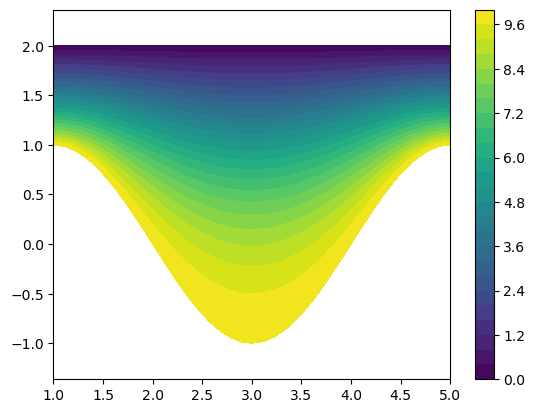

In [2]:
df_x_y = pd.read_csv("./domains/domain_1_1/mesh001/mesh_nodes.csv")
df_z = pd.read_csv("./output/domain_1_1/mesh001/Test_domain_1_1_sin_mesh_001_solution.csv")
df_elements = pd.read_csv("./domains/domain_1_1/mesh001/mesh_polygons.csv")
for element in df_elements.values:
    element -= 1;


triangulation = tri.Triangulation(df_x_y["x"].values, df_x_y["y"].values, triangles=df_elements.values)
plt.tricontourf(triangulation, df_z["sol"].values, levels=25)
# show
#plot_fem_mesh(df_x_y["x"].values, df_x_y["y"].values, df_elements.values)

plt.colorbar()
plt.axis('equal')
plt.show()


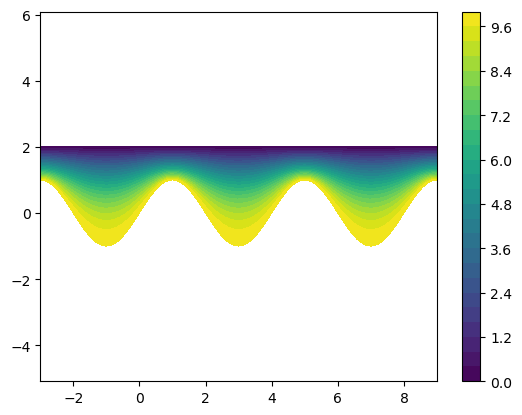

In [ ]:
df_x_y = pd.read_csv("./domains/domain_1_1/mesh001/mesh_nodes.csv")
df_z = pd.read_csv("./output/domain_1_1/mesh001/Test_domain_1_1_sin_mesh_001_solution.csv")
df_elements = pd.read_csv("./domains/domain_1_1/mesh001/mesh_polygons.csv")
for element in df_elements.values:
    element -= 1;


nodes_x = df_x_y["x"].values
tmp = df_x_y["x"].values - 4
nodes_x = np.concatenate((nodes_x, tmp), axis=0)
tmp = df_x_y["x"].values + 4
nodes_x = np.concatenate((nodes_x, tmp), axis=0)

nodes_y = np.concatenate(( df_x_y["y"].values,  df_x_y["y"].values), axis=0)
nodes_y = np.concatenate(( nodes_y,  df_x_y["y"].values), axis=0)

z_val = np.concatenate(( df_z["sol"].values, df_z["sol"].values), axis=0)
z_val = np.concatenate(( z_val, df_z["sol"].values), axis=0)

k = np.max(df_elements.values) + 1
triangles = df_elements.values
triangles = np.concatenate((triangles,  df_elements.values + k ), axis=0)
triangles = np.concatenate((triangles,  df_elements.values + k + k ), axis=0)


triangulation = tri.Triangulation(nodes_x, nodes_y, triangles=triangles)
plt.tricontourf(triangulation, z_val,levels=25)
# show
#plot_fem_mesh(nodes_x, nodes_y, triangles, 0.05)

plt.colorbar()
plt.axis('equal')
plt.show()



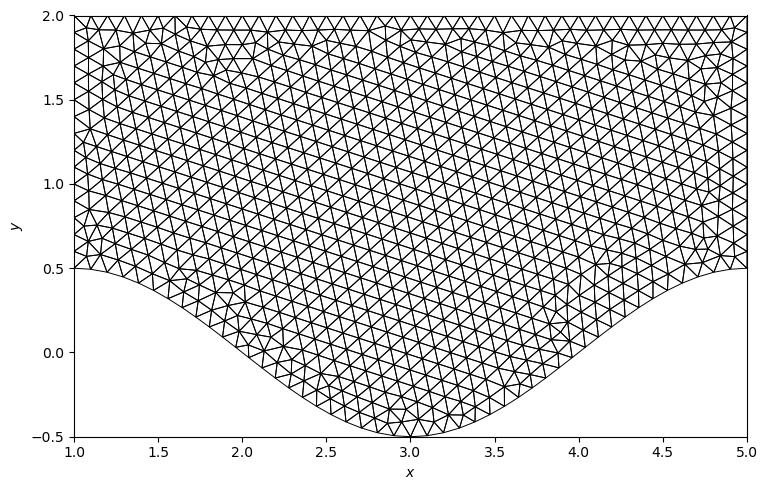

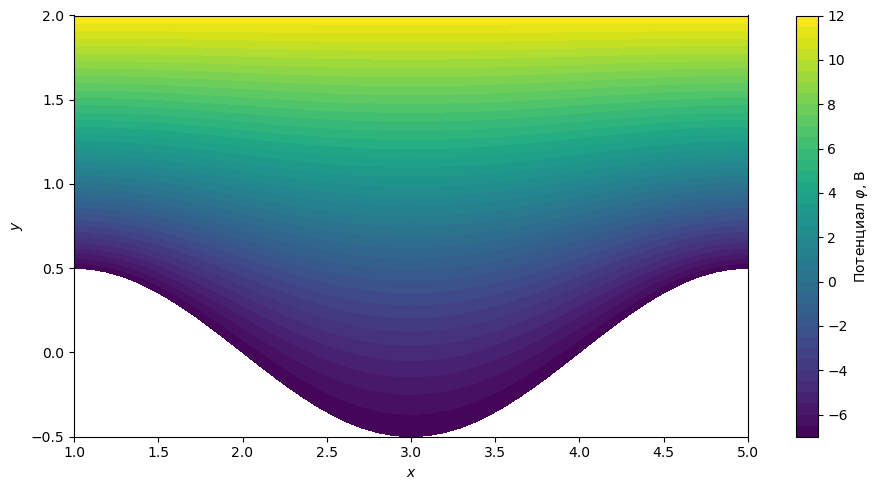

In [151]:
domain_name = "Test_domain_1_1_sin_mesh_0005_calfem"

df_x_y = pd.read_csv("./domains/domain_1_1/mesh0005_calfem/mesh_nodes.csv")
df_z = pd.read_csv("./output/domain_1_1/mesh0005_calfem/Test_domain_1_1_sin_mesh_0005_calfem_solution.csv")
df_elements = pd.read_csv("./domains/domain_1_1/mesh0005_calfem/mesh_polygons.csv")
for element in df_elements.values:
    element -= 1;


plt.figure(figsize=(7.78, 5))
plt.rcParams["figure.autolayout"] = True


# plt.figure(figsize=(5, 5))
# plt.subplot(1, 2, 1)

# plt.xlim(1, 5)
# plt.ylim(-0.5, 2)

# plot_fem_mesh(df_x_y["x"].values, df_x_y["y"].values, df_elements.values, 0.7)
# plt.triplot(df_x_y["x"].values, df_x_y["y"].values, triangles=df_elements.values, linewidth=linewidth, color="black")

# plt.axis('off')
plt.xlabel("$x$")
plt.ylabel("$y$")
plt.axis([1, 5, -0.5, 2])

plt.savefig(export_path + domain_name + "_net.png", transparent=False)
plt.show()
plt.close()

plt.figure(figsize=(10, 5))

plt.rcParams["figure.autolayout"] = True
# plt.subplot(1, 2, 2)

triangulation = tri.Triangulation(df_x_y["x"].values, df_x_y["y"].values, triangles=df_elements.values)
plt.tricontourf(triangulation, df_z["sol"].values, levels = 40)
#plot_fem_mesh(df_x_y["x"].values, df_x_y["y"].values, df_elements.values, 0.7)

plt.axis("image")
plt.colorbar(label = "Потенциал $\\varphi$, В" )
plt.xlabel("$x$")
plt.ylabel("$y$")
plt.savefig(export_path + domain_name + ".png", dpi = 300, transparent=False)
plt.show()

fz_1 = tri.LinearTriInterpolator(triangulation, df_z["sol"].values)
# fz_1_cub = tri.CubicTriInterpolator(triangulation, df_z["sol"].values)



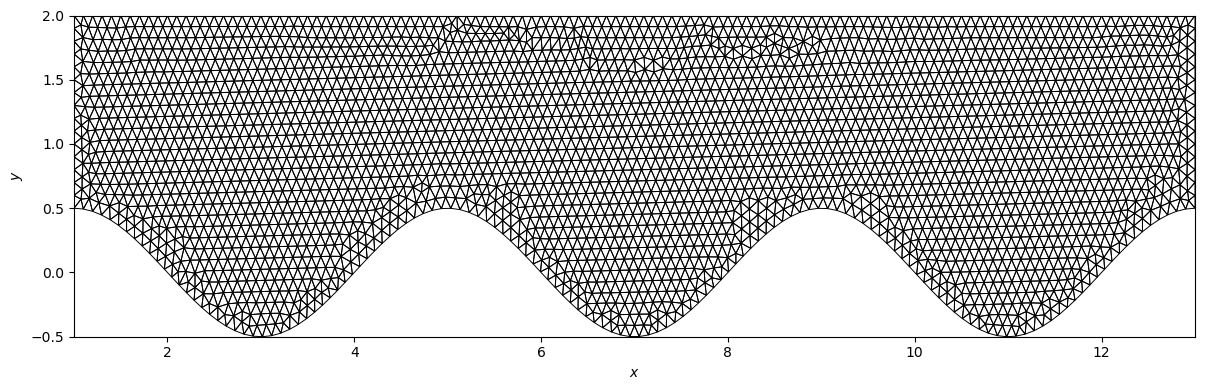

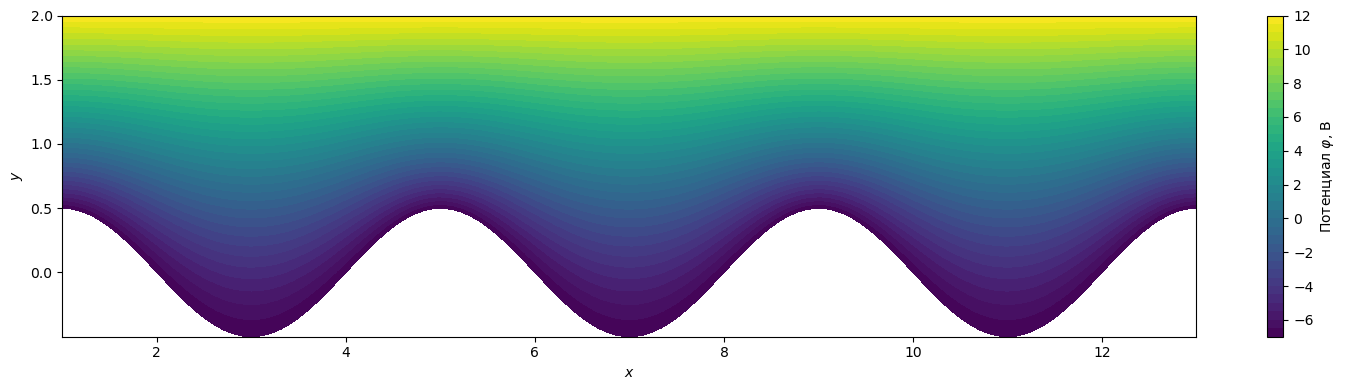

In [152]:
domain_name = "Test_domain_1_1_sin_mesh_0005_3_in_row_calfem"

df_x_y = pd.read_csv("./domains/domain_1_1/mesh0005_3_in_row_calfem/mesh_nodes.csv")
df_z = pd.read_csv("./output/domain_1_1/mesh0005_3_in_row_calfem/Test_domain_1_1_sin_mesh_0005_3_in_row_calfem_solution.csv")
df_elements = pd.read_csv("./domains/domain_1_1/mesh0005_3_in_row_calfem/mesh_polygons.csv")
for element in df_elements.values:
    element -= 1;




plt.figure(figsize=(12.15, 4))
plt.rcParams["figure.autolayout"] = True

# plt.subplot(1, 2, 1)

plt.xlim(1, 5)
plt.ylim(-0.5, 2)
plt.axis([1, 13, -0.5, 2])

plot_fem_mesh(df_x_y["x"].values, df_x_y["y"].values, df_elements.values, 0.7)

# plt.axis('off')
plt.xlabel("$x$")
plt.ylabel("$y$")
plt.axis([1, 13, -0.5, 2])

plt.savefig(export_path + domain_name + "_net.png", transparent=False)
plt.show()
plt.close()

plt.figure(figsize=(15, 4))

plt.rcParams["figure.autolayout"] = True
# plt.subplot(1, 2, 2)

triangulation = tri.Triangulation(df_x_y["x"].values, df_x_y["y"].values, triangles=df_elements.values)
plt.tricontourf(triangulation, df_z["sol"].values, levels = 40)
#plot_fem_mesh(df_x_y["x"].values, df_x_y["y"].values, df_elements.values, 0.7)

# plt.axis("image")
plt.colorbar(label = "Потенциал $\\varphi$, В" )
plt.xlabel("$x$")
plt.ylabel("$y$")
plt.savefig(export_path + domain_name + ".png", dpi = 300, transparent=False)
plt.show()

fz_3_in_row = tri.LinearTriInterpolator(triangulation, df_z["sol"].values)
# fz_1_cub = tri.CubicTriInterpolator(triangulation, df_z["sol"].values)



In [158]:
print(round(float(fz_1(1., 1.27).data), 4))
print(round(float(fz_1(5., 1.27).data), 4))

print(round(float(fz_3_in_row(1., 1.27).data), 4))
print(round(float(fz_3_in_row(5., 1.27).data), 4))
print(round(float(fz_3_in_row(9., 1.27).data), 4))
print(round(float(fz_3_in_row(13., 1.27).data), 4))

3.655
3.655
3.6548
3.659
3.6587
3.6548


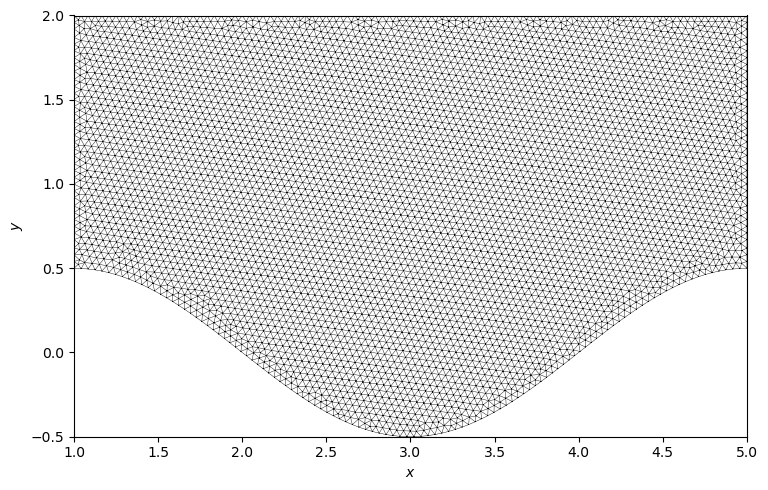

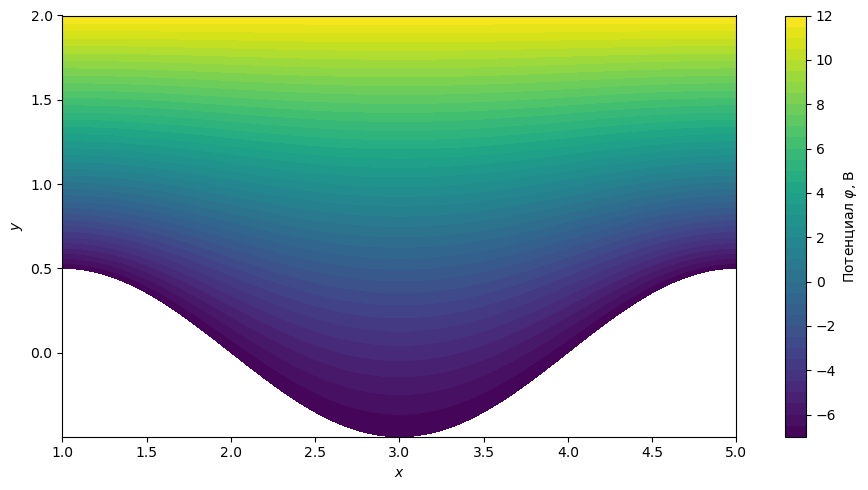

In [3]:
domain_name = "Test_domain_1_1_sin_mesh_0001_calfem"

df_x_y = pd.read_csv("./domains/domain_1_1/mesh0001_calfem/mesh_nodes.csv")
df_z = pd.read_csv("./output/domain_1_1/mesh0001_calfem/Test_domain_1_1_sin_mesh_0001_calfem_solution.csv")
df_elements = pd.read_csv("./domains/domain_1_1/mesh0001_calfem/mesh_polygons.csv")
for element in df_elements.values:
    element -= 1;




plt.figure(figsize=(7.78, 5))
plt.rcParams["figure.autolayout"] = True

# plt.subplot(1, 2, 1)

plt.xlim(1, 5)
plt.ylim(-0.5, 2)
plt.axis([1, 5, -0.5, 2])

# plot_fem_mesh(df_x_y["x"].values, df_x_y["y"].values, df_elements.values, 0.7)
plt.triplot(df_x_y["x"].values, df_x_y["y"].values, triangles=df_elements.values, linewidth=0.3, color="black")

# plt.axis('off')
plt.xlabel("$x$")
plt.ylabel("$y$")
plt.axis([1, 5, -0.5, 2])

plt.savefig(export_path + domain_name + "_net.png", transparent=False)
plt.show()
plt.close()

plt.figure(figsize=(10, 5))

plt.rcParams["figure.autolayout"] = True
# plt.subplot(1, 2, 2)

triangulation = tri.Triangulation(df_x_y["x"].values, df_x_y["y"].values, triangles=df_elements.values)
plt.tricontourf(triangulation, df_z["sol"].values, levels = 40)
#plot_fem_mesh(df_x_y["x"].values, df_x_y["y"].values, df_elements.values, 0.7)

plt.axis("image")
plt.colorbar(label = "Потенциал $\\varphi$, В" )
plt.xlabel("$x$")
plt.ylabel("$y$")
plt.savefig(export_path + domain_name + ".png", dpi = 300, transparent=False)
plt.show()

fz_1 = tri.LinearTriInterpolator(triangulation, df_z["sol"].values)
# fz_1_cub = tri.CubicTriInterpolator(triangulation, df_z["sol"].values)



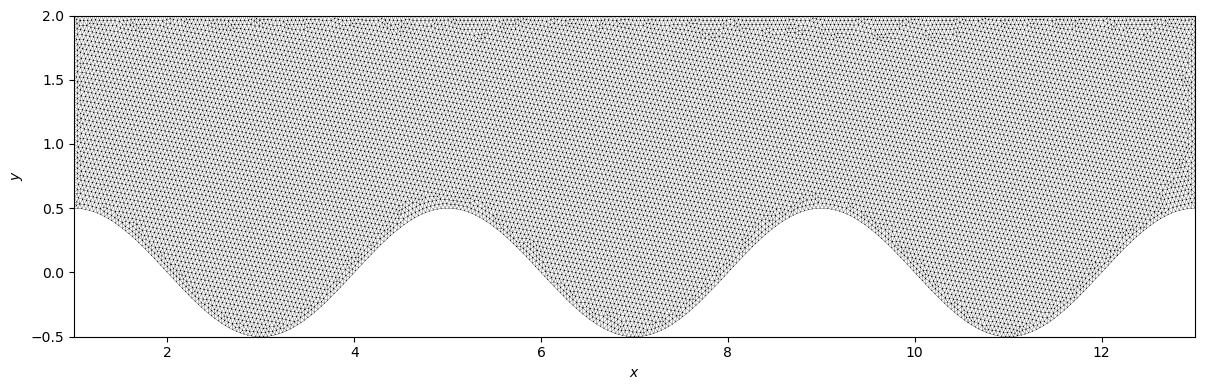

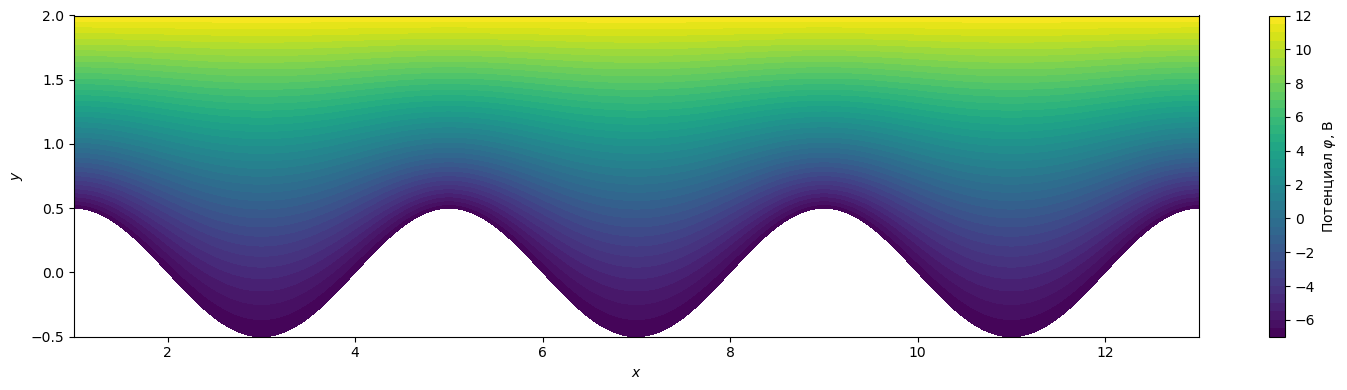

In [7]:
domain_name = "Test_domain_1_1_sin_mesh_0001_3_in_row_calfem"

df_x_y = pd.read_csv("./domains/domain_1_1/mesh0001_3_in_row_calfem/mesh_nodes.csv")
df_z = pd.read_csv("./output/domain_1_1/mesh0001_3_in_row_calfem/Test_domain_1_1_sin_mesh_0001_3_in_row_calfem_solution.csv")
df_elements = pd.read_csv("./domains/domain_1_1/mesh0001_3_in_row_calfem/mesh_polygons.csv")
for element in df_elements.values:
    element -= 1;




plt.figure(figsize=(12.15, 4))
plt.rcParams["figure.autolayout"] = True

# plt.subplot(1, 2, 1)

plt.xlim(1, 5)
plt.ylim(-0.5, 2)
plt.axis([1, 13, -0.5, 2])

# plot_fem_mesh(df_x_y["x"].values, df_x_y["y"].values, df_elements.values, 0.7)
plt.triplot(df_x_y["x"].values, df_x_y["y"].values, triangles=df_elements.values, linewidth=0.2, color="black")

# plt.axis('off')
plt.xlabel("$x$")
plt.ylabel("$y$")
plt.axis([1, 13, -0.5, 2])

plt.savefig(export_path + domain_name + "_net.png", transparent=False)
plt.show()
plt.close()

plt.figure(figsize=(15, 4))

plt.rcParams["figure.autolayout"] = True
# plt.subplot(1, 2, 2)

triangulation = tri.Triangulation(df_x_y["x"].values, df_x_y["y"].values, triangles=df_elements.values)
plt.tricontourf(triangulation, df_z["sol"].values, levels = 40)
#plot_fem_mesh(df_x_y["x"].values, df_x_y["y"].values, df_elements.values, 0.7)

# plt.axis("image")
plt.colorbar(label = "Потенциал $\\varphi$, В" )
plt.xlabel("$x$")
plt.ylabel("$y$")
plt.savefig(export_path + domain_name + ".png", dpi = 300, transparent=False)
plt.show()

fz_3_in_row = tri.LinearTriInterpolator(triangulation, df_z["sol"].values)
# fz_1_cub = tri.CubicTriInterpolator(triangulation, df_z["sol"].values)



In [26]:
print(round(float(fz_1(1., 1.25).data), 5))
print(round(float(fz_1(5., 1.25).data), 5))

print(round(float(fz_3_in_row(1., 1.25).data), 5))
print(round(float(fz_3_in_row(5., 1.25).data), 5))
print(round(float(fz_3_in_row(9., 1.25).data), 5))
print(round(float(fz_3_in_row(13., 1.25).data), 5))

3.41913
3.41913
3.41911
3.41851
3.41837
3.41911


In [27]:
print(round(float(fz_1(1., 1.6).data), 5))
print(round(float(fz_1(5., 1.6).data), 5))

print(round(float(fz_3_in_row(1., 1.6).data), 5))
print(round(float(fz_3_in_row(5., 1.6).data), 5))
print(round(float(fz_3_in_row(9., 1.6).data), 5))
print(round(float(fz_3_in_row(13., 1.6).data), 5))

7.49274
7.49274
7.49271
7.49263
7.49273
7.49271


In [24]:
print(round(float(fz_1(3., 0.0).data), 5))

print(round(float(fz_3_in_row(3., 0.0).data), 5))
print(round(float(fz_3_in_row(7., 0.0).data), 5))
print(round(float(fz_3_in_row(11., 0.0).data), 5))

-4.73791
-4.73819
-4.73749
-4.73857


In [25]:
print(round(float(fz_1(3., 1.5).data), 5))

print(round(float(fz_3_in_row(3., 1.5).data), 5))
print(round(float(fz_3_in_row(7., 1.5).data), 5))
print(round(float(fz_3_in_row(11., 1.5).data), 5))

7.20501
7.20507
7.20512
7.20504
